# Week 1

## Exercise 1

In [16]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

In [34]:
thetas = np.linspace(0, 1, 1000)

n=[20, 40]
y=[15, 30]

a0 = [1, 3, 15]
b0 = [1, 5, 25]

A=['Strong', 'Weak']
B=['Uniform', 'Weak', 'Strong']

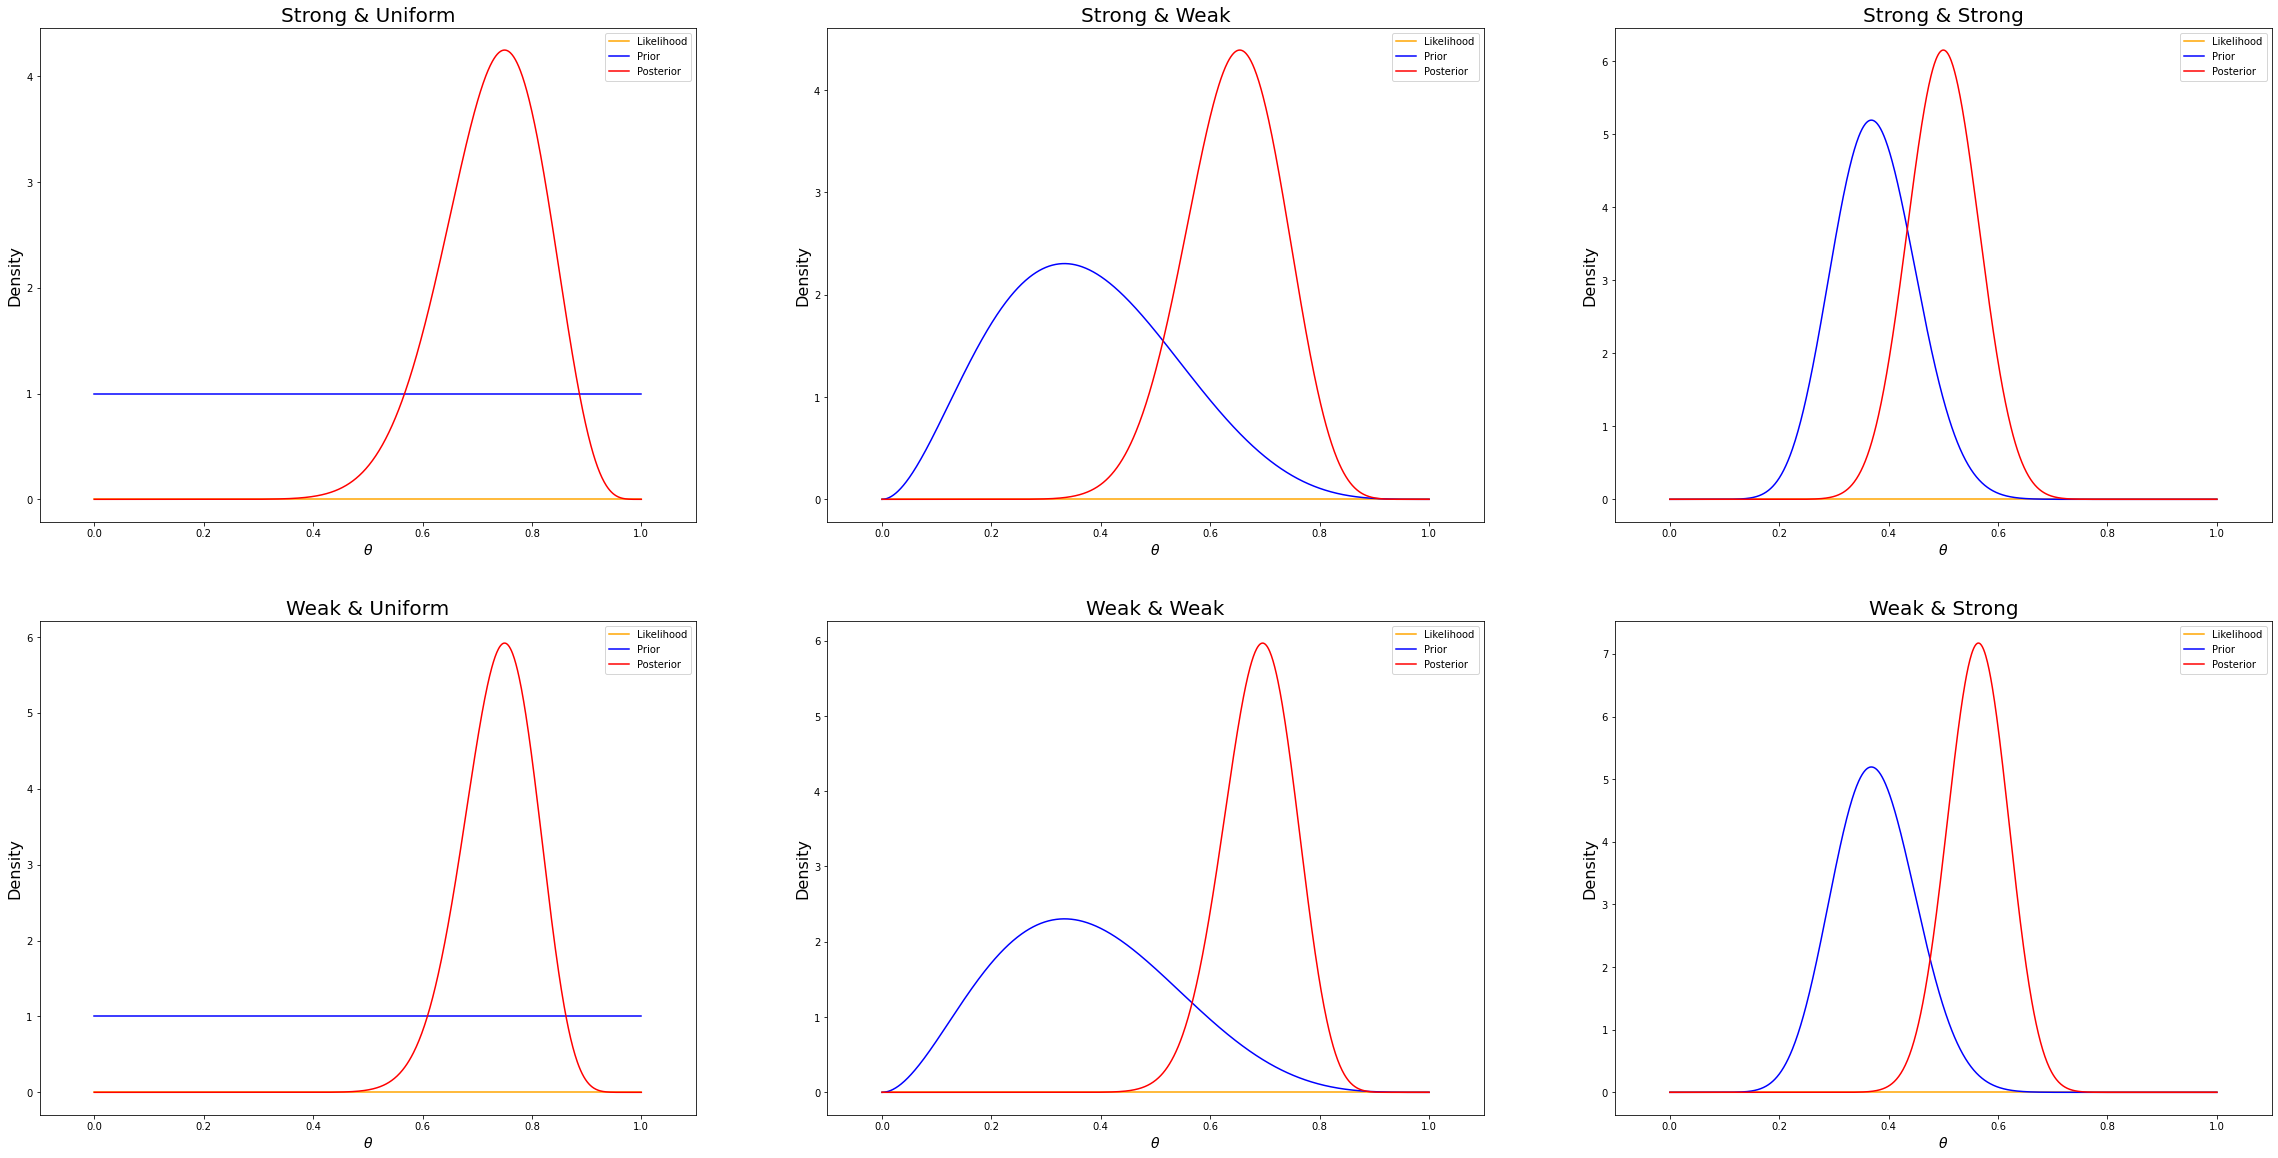

In [38]:
#prior: st.beta(a=a0, b=b0)
#Posterior: post = st.beta(a=a0+n, b=b0+(n-y))

fig, ax = plt.subplots(2, 3, figsize=(40,20))

for i in range(2):
    for j in range(3):
        ax[i, j].plot(thetas, likelihood(thetas, n[i], y[i]), label='Likelihood', c='orange')
        ax[i, j].plot(thetas, st.beta(a0[j], b0[j]).pdf(thetas), label='Prior', c='blue')
        ax[i, j].plot(thetas, st.beta(a=a0[j]+y[i], b=b0[j]+n[i]-y[i]).pdf(thetas), label='Posterior', c='red')
        ax[i, j].set_xlim([-0.10, 1.10])
        ax[i, j].set_title(A[i]+' & '+B[j], fontsize=20)
        ax[i, j].set_xlabel(r'$\theta$', fontsize=14)
        ax[i, j].set_ylabel('Density', fontsize=16)
        ax[i, j].legend()

## Exercise 2

In [39]:
from IPython.display import Image

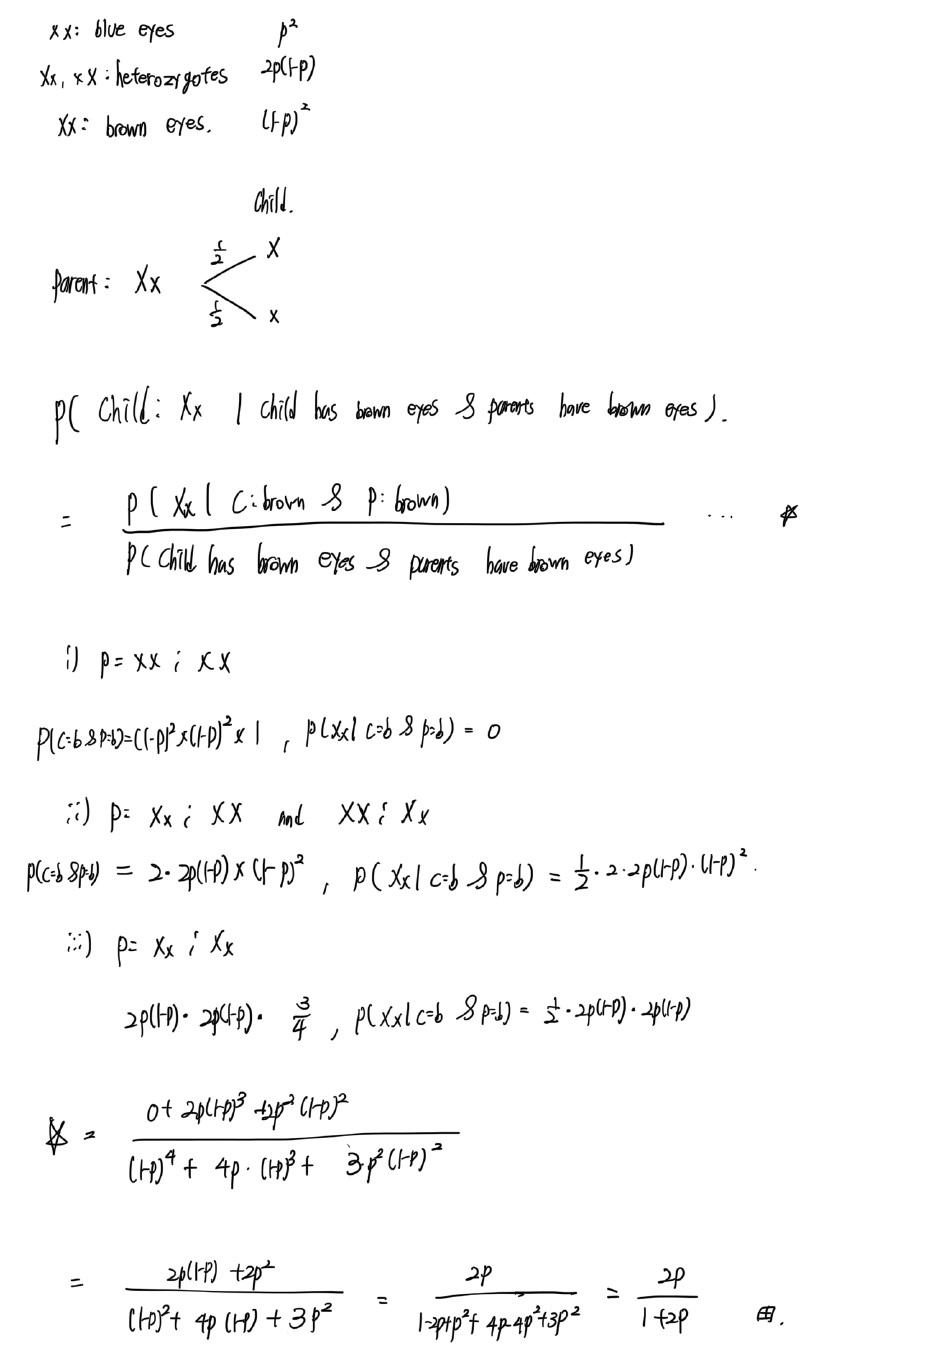

In [41]:
Image("a.jpg")

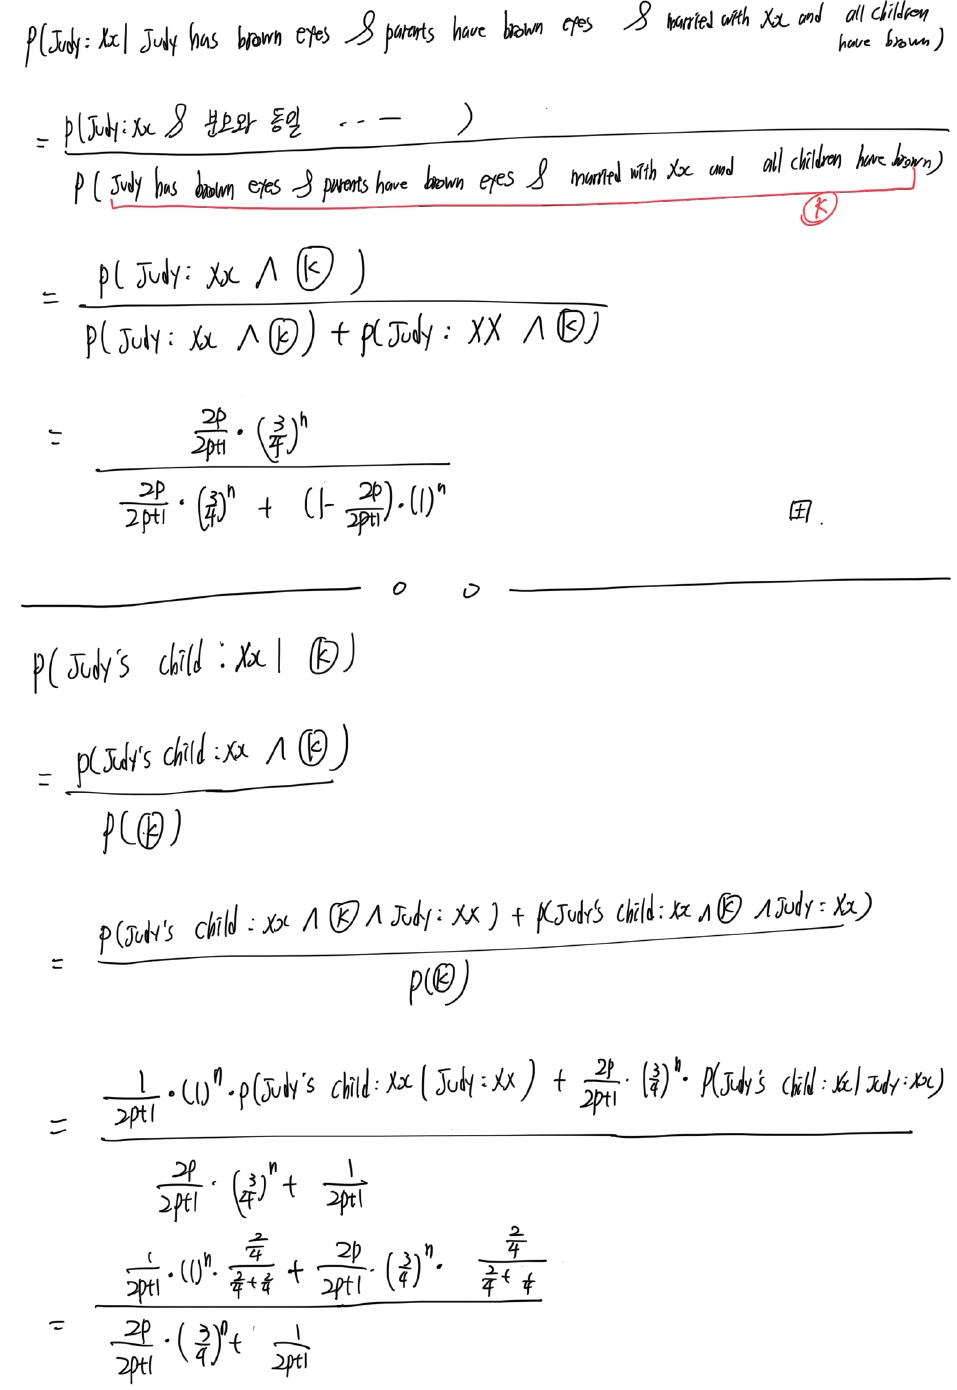

In [43]:
Image("b.jpg")

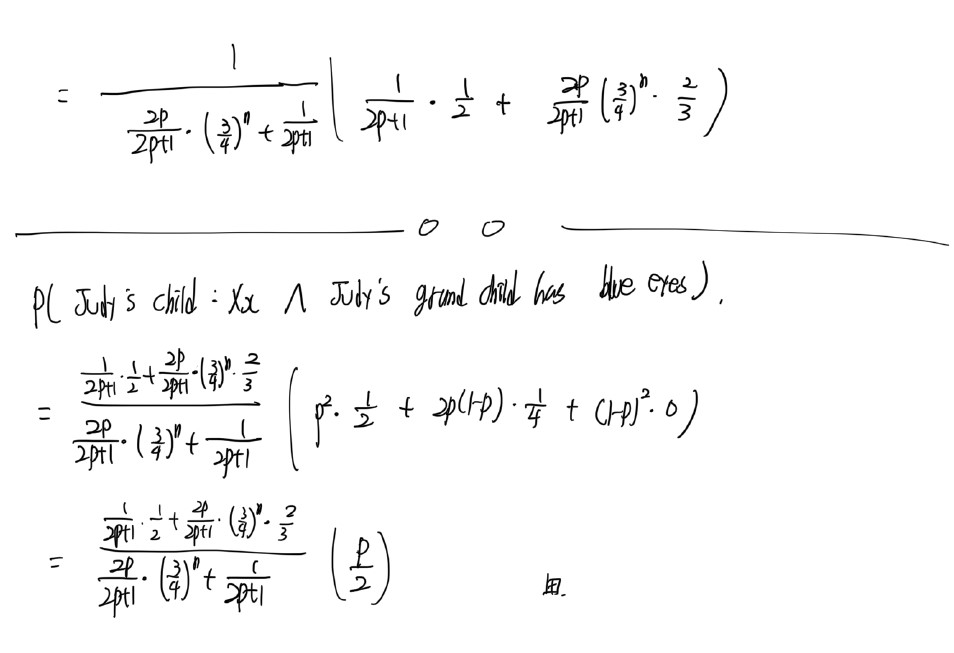

In [44]:
Image("c.jpg")

## Exercise 3

### a)
1. $\frac{\alpha}{\alpha + \beta}$ = 0.9 $\Leftrightarrow \alpha=9\beta$
2. 0.8미만, 0.97초과일 것 같지는 않다. $\rightarrow$ Confidence interval?

In [45]:
st.beta.cdf(0.97, 9, 1) - st.beta.cdf(0.8, 9,1)

0.626013330654565

In [46]:
for i in range(10):
    print(st.beta.cdf(0.97, 9*i, 1*i) - st.beta.cdf(0.8, 9*i,1*i))
    i+=1

nan
0.626013330654565
0.8071787111726657
0.892715183397574
0.9378685312699843
0.9630476420328056
0.9775813072560174
0.9861808694298634
0.991368387370736
0.9945475074357272


- CI를 95%로 설정한다면 i=5, 99%로 설정한다면 i=9.
- 99%로 설정해보자

$a=81, b=9, \theta \sim Beta(81, 9)$ 

### b)
- 10명 모두 생존
- $n=10, y=10$
- $\theta \sim Beta(81+y, 9+n-y) = Beta(91, 9)$

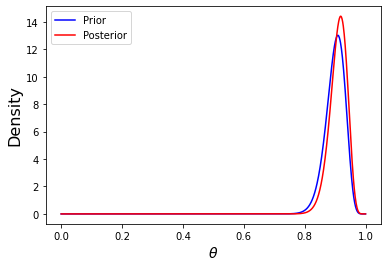

In [48]:
thetas = np.linspace(0, 1, 1000)

prior = st.beta(81, 9)
post = st.beta(91,9)

plt.plot(thetas, prior.pdf(thetas), label='Prior',c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend()

### c)

$\theta|y \sim Beta(99,1)$

$P(X_{new}|data) = \int_0^1 P(X_{new}|\theta)P(\theta|data)d\theta=\frac{\Gamma{(100)}}{\Gamma{(91)}\Gamma{(9)}}\int_0^1 \theta^{X_{new}} (1-\theta)^{1-X_{new}} \  \theta^{90} (1-\theta)^8 d\theta $

$P(X_{new}|data) = \frac{\Gamma{(91+X_{new})} \Gamma{(10-X_{new})}}{\Gamma{(101)}} \frac{\Gamma{(100)}}{\Gamma{(91)}\Gamma{(9)}}$ 

$P(X_{new}=1|data) = \frac{\Gamma{(92)} \Gamma{(9)}}{\Gamma{(101)}} \frac{\Gamma{(100)}}{\Gamma{(91)}\Gamma{(9)}} = 0.91$

$P(X_{new}=0|data) = \frac{\Gamma{(91)} \Gamma{(10)}}{\Gamma{(101)}} \frac{\Gamma{(100)}}{\Gamma{(91)}\Gamma{(9)}} = 0.09$

- 20명 환자 중 2명 이상 사망할 확률
$1 - \sum_{i=0}^1 \left( \begin{array}{c} 20 \\ i \end{array} \right) {0.91}^{20-i} {0.09}^i \approx 0.55$